# Introduction to regression with Neural Networks in Tensorflow

In [49]:
# Import Tensorflow

import tensorflow as tf
print(tf.__version__)

2.10.0


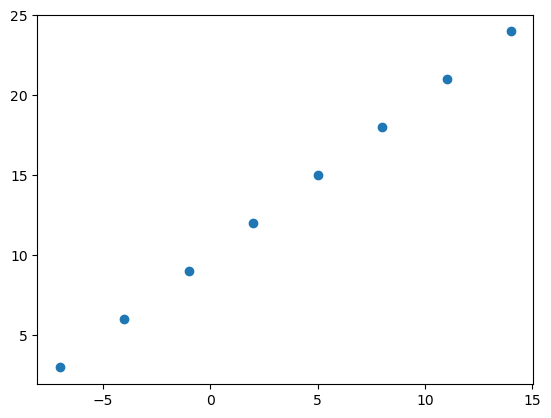

In [50]:
# Create data to view and fit

import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X, y)

In [51]:
# Here's the actual formula
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [52]:
# Input and Output Shapes (Is a scalar - Rank 0 tensor) - 1 X value to predict 1 Y value
X[0], y[0]

(-7.0, 3.0)

In [53]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [54]:
X[0].ndim

0

In [55]:
# Turn NP array into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [56]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=["mae"]
)

In [57]:
# Fit data onto model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 275ms/step - loss: 9.7109 - mae: 9.7109
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 9.5784 - mae: 9.5784
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 9.4459 - mae: 9.4459
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 9.3134 - mae: 9.3134
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 9.1809 - mae: 9.1809


In [58]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [59]:
# Make a prediction
y_pred = model.predict([17.0])

1/1 [==============================] - 0s 62ms/step


In [60]:
# Clear session for next example
tf.keras.backend.clear_session()

## Let's improve model...

1) **Creating a model** - we can add more layers, increase number of hidden layers, change activation function of each models.  Start with small model and make into larger model

2) **Compiling a model** - here we might change optimization of a function or **learning rate** of the optimization function

3) **Fitting a model** - here we might fit a model for more **epoch** (leaving it training for longer), or on more data (give the model more data to learn from).

In [61]:
# Set random seed
tf.random.set_seed(42)

# Create Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [62]:
# Fit model (This time we train longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 264ms/step - loss: 14.6278 - mae: 14.6278
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 14.4953 - mae: 14.4953
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 14.3628 - mae: 14.3628
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 14.2303 - mae: 14.2303
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 14.0978 - mae: 14.0978
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 13.9653 - mae: 13.9653
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 13.8328 - mae: 13.8328
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 13.7003 - mae: 13.7003
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 13.5678 - mae: 13.5678
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 13.4353 - mae: 13.4353
Epoch 11/100
1/1 [==============================] - 0s 4m

In [63]:
# Predict model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 60ms/step


array([[29.927141]], dtype=float32)

In [64]:
# Clear session for next example
tf.keras.backend.clear_session()

In [65]:
# Let's see if we can improve it even more

# 1. Create the model (this time with an extra hidden layer)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100


/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 342ms/step - loss: 13.0496 - mae: 13.0496
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 12.4070 - mae: 12.4070
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7653 - mae: 11.7653
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1195 - mae: 11.1195
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4652 - mae: 10.4652
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7980 - mae: 9.7980
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 9.1137 - mae: 9.1137
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.4084 - mae: 8.4084
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.6782 - mae: 7.6782
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9199 - mae: 6.9199
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 6.7250 

In [66]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 67ms/step


array([[27.867786]], dtype=float32)

In [67]:
# Clear session for next example
tf.keras.backend.clear_session()

In [68]:
# Let's see if we can improve it even more
tf.random.set_seed(42)

# 1. Create the model (this time with an extra hidden layer)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), 
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 382ms/step - loss: 12.5070 - mae: 12.5070
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7700 - mae: 11.7700
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0227 - mae: 11.0227
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2636 - mae: 10.2636
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.4913 - mae: 9.4913
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.7044 - mae: 8.7044
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 7.9009 - mae: 7.9009
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.0777 - mae: 7.0777
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8346 - mae: 6.8346
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.2711 - mae: 7.2711
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - los

In [69]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [70]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 66ms/step


array([[26.998356]], dtype=float32)

In [71]:
# Best model so far
tf.keras.backend.clear_session()

# Let's see if we can improve it even more
tf.random.set_seed(42)

# 1. Create the model (this time with an extra hidden layer)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mse",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 


Epoch 1/100
1/1 [==============================] - 0s 296ms/step - loss: 343.7876 - mae: 15.4783
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 85.0425 - mae: 7.5658
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 73.0235 - mae: 7.8515
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 70.3778 - mae: 7.3938
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 68.1544 - mae: 7.3416
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 66.0137 - mae: 7.2128
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 63.9406 - mae: 7.1011
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 61.9327 - mae: 6.9882
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 59.9878 - mae: 6.8777
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 58.1040 - mae: 6.7688
Epoch 11/100
1/1 [==============================] - 0s 3ms/step -

In [72]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 61ms/step


array([[27.026999]], dtype=float32)

In [73]:
# Create a demo tensor for our housing prediction model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700,])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Evaluating a model

In practice, a typical workflow you go through is:
``` 
Build model -> Fit -> Evaluate -> Build model -> Fit -> Evaluate -> Build model -> Fit -> Evaluate
```

When it comes to evaluation, there are 3 words you should memorize:
> "Visualize, Visualize, Visualize"

It's a good idea to visualize:
* The data
* The model
* The training of the model
* The prediction of the model

In [74]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [75]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

### The three sets

* Training set - model learns from this data, typically 70-80% of data
* Validation set - model tunes from this data, typically remaining 10%-15% data
* Test Set - model gets evaluated from this data, typically 10% - 15% data


In [76]:
# Check sample length
len(X), len(y)

(50, 50)

In [77]:
# Spilt the data into training and test sets
SPILT = 0.8

# Features training & testing (X)
X_train = X[:int(SPILT * len(X))]
X_test = X[int(SPILT * len(X)):]

# Labels training & testing (y)
y_train = y[:int(SPILT * len(y))]
y_test = y[int(SPILT * len(y)):]

# Show output
X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [78]:
# Show trainign and testing length
len(X_train), len(X_test)

(40, 10)

### Visualizing data

Text(0.5, 1.0, 'Training and Testing Data')

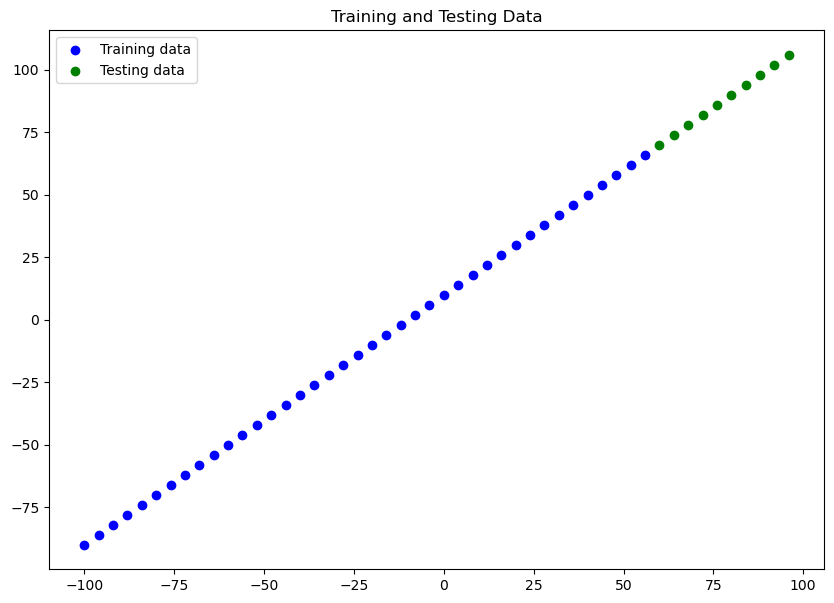

In [79]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a legend and title
plt.legend()
plt.title("Training and Testing Data")

In [81]:
# Let's look how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model on training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 31.7545 - mae: 31.7545
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 8.9157 - mae: 8.9157
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 9.7834 - mae: 9.7834
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 11.9641 - mae: 11.9641
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0280 - mae: 11.0280
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1865 - mae: 10.1865
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 9.2018 - mae: 9.2018
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1344 - mae: 9.1344
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 11.7494 - mae: 11.7494
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 13.6703 - mae: 13.6703
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - l

In [82]:
# Visualize the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Clear previous models
tf.keras.backend.clear_session()

In [95]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1) Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="one_of_many_models_to_build")

# 2) Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"])

In [96]:
# Shows us the model architecture and parameters (Visualize the model)
model.summary()

Model: "one_of_many_models_to_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total Param - total number of parameters in the model
* Trainable Param - there are the parameters in the model that can update as it trains
* Non-trainable Param - parameters not updated during training (typical when using transfer learning)

In [97]:
# 3) Fit the model to training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 47.1627 - mae: 47.1627
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 34.8751 - mae: 34.8751
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 38.8351 - mae: 38.8351
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8057 - mae: 27.8057
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 15.1555 - mae: 15.1555
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 12.0579 - mae: 12.0579
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 11.3897 - mae: 11.3897
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2071 - mae: 11.2071
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 41.6007 - mae: 41.6007
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 28.8485 - mae: 28.8485
Epoch 11/100
2/2 [==============================] - 0s 2ms/

In [98]:
# Get another model summary
model.summary()

Model: "one_of_many_models_to_build"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


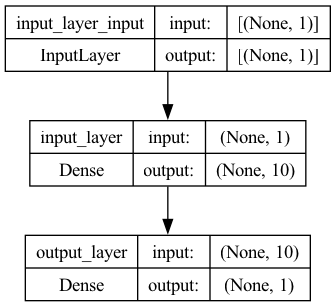

In [100]:
from tensorflow import keras
from keras.utils import plot_model

# Plot the model
plot_model(model, show_shapes=True)

### Visualizing our model's predictions

Plot against ground truth labels

`y_test` vs `y_pred` (ground truth vs model predictions)

In [104]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred, y_test

1/1 [==============================] - 0s 27ms/step


(array([[ 76.7989  ],
        [ 81.807144],
        [ 86.81539 ],
        [ 91.82363 ],
        [ 96.83187 ],
        [101.840126],
        [106.848366],
        [111.85661 ],
        [116.86486 ],
        [121.87311 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [117]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend()
    plt.title("Training, Test and Prediction Data")

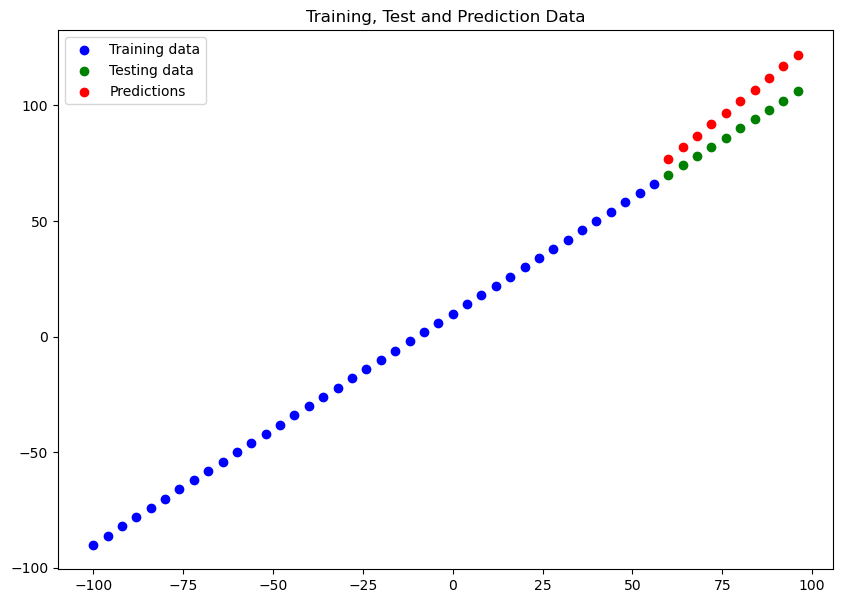

In [118]:
# Plot the predictions
plot_prediction(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred
)

### Evaluating our predictions with regression evaluation metrics

Depending on problem, there will be different evaluation metrics to work on.

With regression, there are two main ones

* MAE - mean absolute error, "on average" how wrong is each of my model's predictions.  Great as general starter metric for any regression problems

* MSE - mean square error, "square the average errors".  Use when larger errors are more significant than smaller errors

#### Other metrics
* Huber - Combination of MAE and MSE.  Less sensitive to outlier than MAE and MSE

In [120]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 11.3360 - mae: 11.3360


[11.336000442504883, 11.336000442504883]

In [129]:
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 76.7989  ],
        [ 81.807144],
        [ 86.81539 ],
        [ 91.82363 ],
        [ 96.83187 ],
        [101.840126],
        [106.848366],
        [111.85661 ],
        [116.86486 ],
        [121.87311 ]], dtype=float32))

In [130]:
# Convert y_pred to a tensor
y_pred = tf.constant(y_pred)

In [137]:
# Notice the shape mismatch
y_test.shape, y_pred.shape, y_test, y_pred

(TensorShape([10]),
 TensorShape([10, 1]),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 76.7989  ],
        [ 81.807144],
        [ 86.81539 ],
        [ 91.82363 ],
        [ 96.83187 ],
        [101.840126],
        [106.848366],
        [111.85661 ],
        [116.86486 ],
        [121.87311 ]], dtype=float32)>)

In [138]:
# Calculate the mean absolute error (tf.squeeze to get rid of the extra dimension)
mae = tf.keras.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=11.336>

In [140]:
# Calculate the mean squared error (tf.squeeze to get rid of the extra dimension)
mse = tf.keras.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=136.89153>

In [141]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.keras.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.keras.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))

### Running experiments to improve our model

build -> fit -> evaluate -> tweak and repeat...

`How to Improve`
1) Get more data 
2) Make model larger (more layers, more units)
3) Train longer (bigger epoch)

Let's do 3 modelling experiments
1) One layer but 100 epoch
2) Two layer 100 epoch
3) Two layer 500 epoch

In [161]:
# Clear Session
tf.keras.backend.clear_session()

In [204]:
# Experiment One
tf.random.set_seed(42)

# Build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 106.0501 - mae: 106.0501
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 70.5946 - mae: 70.5946
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 33.1028 - mae: 33.1028
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.3738 - mae: 8.3738
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 11.8505 - mae: 11.8505
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 10.9726 - mae: 10.9726
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.5096 - mae: 8.5096
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 8.9070 - mae: 8.9070
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 17.1856 - mae: 17.1856
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 12.4746 - mae: 12.4746
Epoch 11/100
2/2 [==============================] - 0s 4ms/step

1/1 [==============================] - 0s 52ms/step


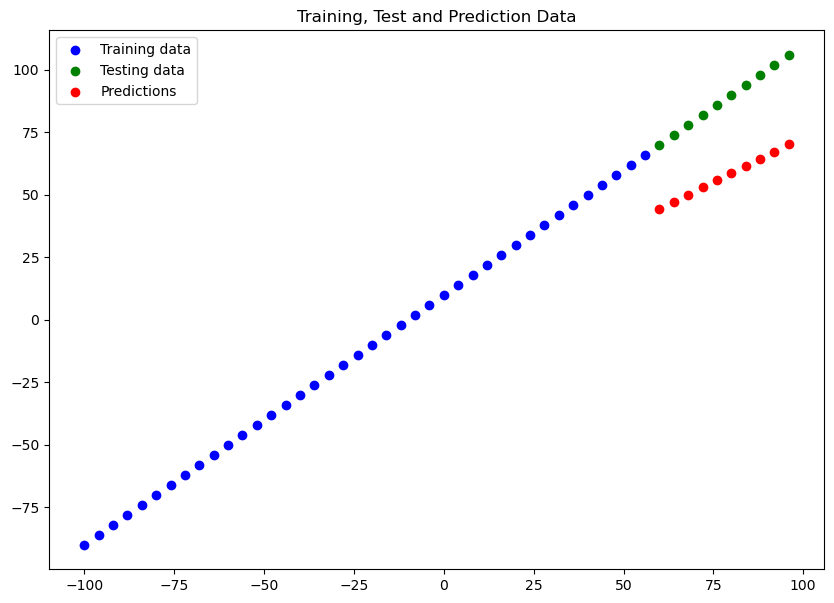

In [205]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_prediction(predictions=y_preds_1)

In [166]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.62945>,
 <tf.Tensor: shape=(), dtype=float32, numpy=948.61>)

In [179]:
tf.keras.backend.clear_session()

In [202]:
# Build the second model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 42.5354 - mae: 42.5354
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 29.1596 - mae: 29.1596
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 34.6713 - mae: 34.6713
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 25.4074 - mae: 25.4074
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 15.0162 - mae: 15.0162
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.9431 - mae: 11.9431
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.2681 - mae: 11.2681
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1355 - mae: 11.1355
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 40.9002 - mae: 40.9002
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 28.2375 - mae: 28.2375
Epoch 11/100
2/2 [==============================] - 0s 3ms/

1/1 [==============================] - 1s 885ms/step


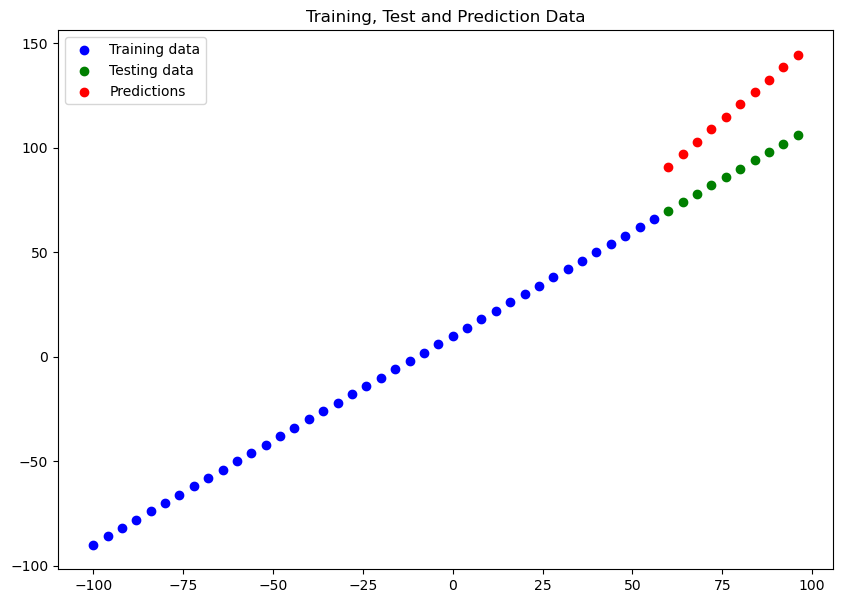

In [203]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

In [172]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.947834>,
 <tf.Tensor: shape=(), dtype=float32, numpy=928.3631>)

In [195]:
# Clear Session
tf.keras.backend.clear_session()

In [206]:
# Model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])
model_3.compile(loss=tf.keras.losses.mae,   
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_3.fit(X_train, y_train, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 32.0308 - mae: 32.0308
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 27.1691 - mae: 27.1691
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 31.9940 - mae: 31.9940
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 28.9640 - mae: 28.9640
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 15.6920 - mae: 15.6920
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 12.4342 - mae: 12.4342
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.6931 - mae: 11.6931
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 12.0603 - mae: 12.0603
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 37.7248 - mae: 37.7248
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 25.3562 - mae: 25.3562
Epoch 11/500
2/2 [==============================] - 0s 13ms

1/1 [==============================] - 0s 60ms/step


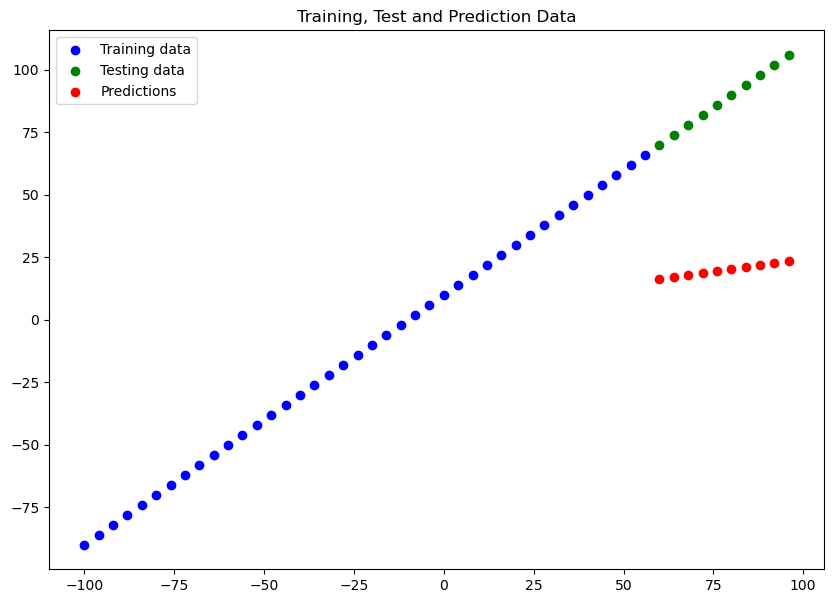

In [207]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_prediction(predictions=y_preds_3)

In [198]:
# Calculate model_2 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=65.956924>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4430.1255>)

### Compare the 3 model results

* Note - start with small fast models, make sure they work, and scale up when neccessary

In [208]:
# Let's compare using pandas
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.629450,948.609985
1,model_2,29.947834,928.363098
2,model_3,65.956924,4430.125488


# Tracking your experiments

One good habit of machine learning is to track the results of your experiments
When doing so, it can be tedious if you are running lots of experiments
But there are tools to help us

**Resources**

* Tensorboard - component of Tensorflow library to keep track of modelling experiments
* Weights & Bias - third party library



### How to save model to use them outside 

There are two main format we can save our models into.

1) Saved Model format
2) The HDF5 format

In [211]:
# Let's save model_2 in SavedModel format (default)
model_2.save("exports/model_2")

INFO:tensorflow:Assets written to: exports/model_2/assets


In [212]:
# Let's save model_2 in HDF5 format
model_2.save("exports/model_2.h5")

In [229]:
# Let's load the saved model format and make a prediction
load_saved_model_format = tf.keras.models.load_model("exports/model_2")
load_hdf5_format = tf.keras.models.load_model("exports/model_2.h5")
load_saved_model_format.summary(), load_hdf5_format.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 3

(None, None)

1/1 [==============================] - 0s 62ms/step


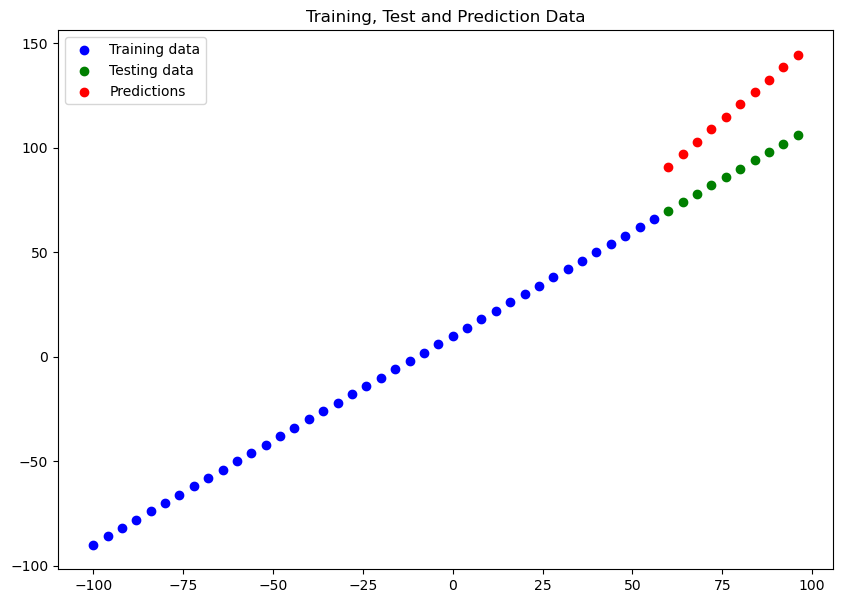

In [223]:
# Make and plot predictions for loaded saved model format
saved_model_format_preds = load_saved_model_format.predict(X_test)
plot_prediction(predictions=saved_model_format_preds)

1/1 [==============================] - 0s 60ms/step


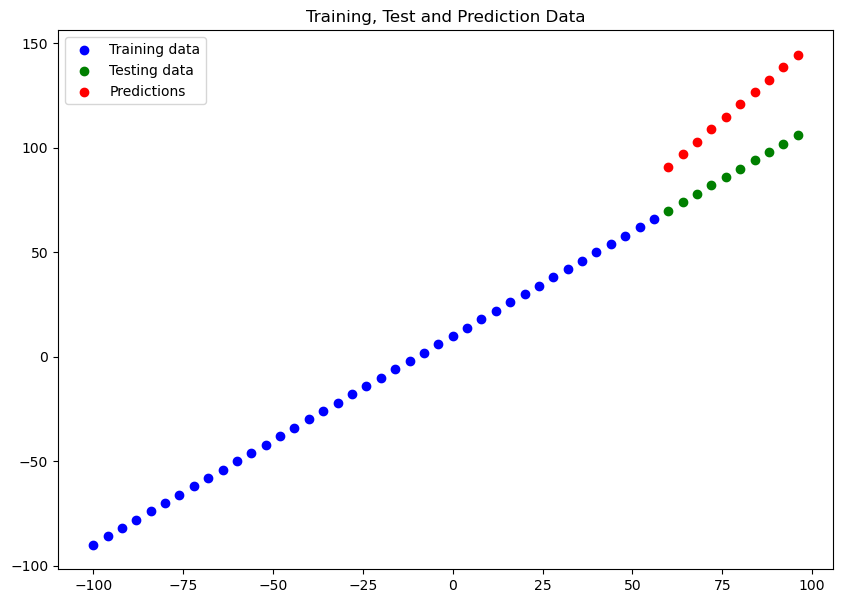

In [224]:
# Make and plot predictions for loaded loaded hdf5 format
saved_hdf5_preds = load_hdf5_format.predict(X_test)
plot_prediction(predictions=saved_hdf5_preds)

1/1 [==============================] - 0s 28ms/step


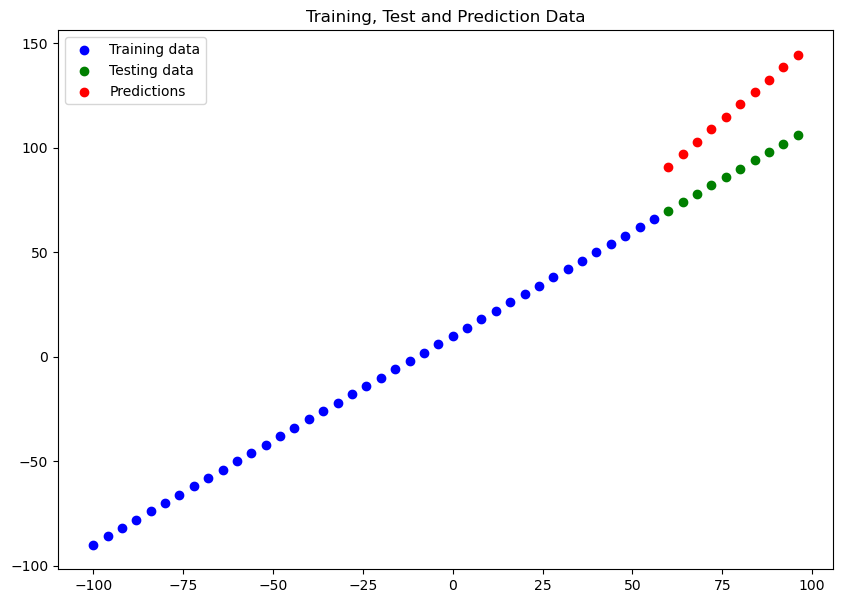

In [225]:
# Make and plot predictions for loaded model_2
y_preds_2 = model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

In [228]:
# Compare model_2 predictions with SavedModel format predictions
y_preds_2 == saved_hdf5_preds, y_preds_2 == saved_model_format_preds

(array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]),
 array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]]))

 ### A larger example

In [232]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
insurance = pd.read_csv("data/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [240]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [245]:
# Need to convert non-numerical data to numerical data (one-hot encoding)
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [250]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [276]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [277]:
# Refresher
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [355]:
tf.keras.backend.clear_session()

In [326]:
tf.random.set_seed(42)

# Build a neural network model to fit on our data
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [327]:
# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae, 
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

In [328]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [329]:
# Fit the model
history = insurance_model.fit(X_train.astype(float), tf.expand_dims(y_train, axis=-1), epochs=1000)

Epoch 1/1000
34/34 [==============================] - 1s 2ms/step - loss: 13303.0693 - mae: 13303.0693
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 12986.2715 - mae: 12986.2715
Epoch 3/1000
34/34 [==============================] - 0s 2ms/step - loss: 11507.2012 - mae: 11507.2012
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 8278.0771 - mae: 8278.0771
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 7486.0132 - mae: 7486.0132
Epoch 6/1000
34/34 [==============================] - 0s 2ms/step - loss: 7434.0503 - mae: 7434.0503
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 7367.9912 - mae: 7367.9912
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 7316.6196 - mae: 7316.6196
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 7264.2456 - mae: 7264.2456
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 7210.7085 

In [330]:
# Check result of insurance model on test data
insurance_model.evaluate(X_test.astype(float), y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1628.2240 - mae: 1628.2240


[1628.2239990234375, 1628.2239990234375]

In [339]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now, model isn't performing well at all...

In [356]:
# Improved Model
tf.random.set_seed(42)

# Build a neural network model to fit on our data
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae, 
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
history = insurance_model_2.fit(X_train.astype(float), tf.expand_dims(y_train, axis=-1), epochs=1000) 

Epoch 1/1000
34/34 [==============================] - 0s 1ms/step - loss: 13338.8984 - mae: 13338.8984
Epoch 2/1000
34/34 [==============================] - 0s 1ms/step - loss: 13312.8252 - mae: 13312.8252
Epoch 3/1000
34/34 [==============================] - 0s 1ms/step - loss: 13259.6016 - mae: 13259.6016
Epoch 4/1000
34/34 [==============================] - 0s 1ms/step - loss: 13160.0322 - mae: 13160.0322
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 12989.4541 - mae: 12989.4541
Epoch 6/1000
34/34 [==============================] - 0s 1ms/step - loss: 12719.7168 - mae: 12719.7168
Epoch 7/1000
34/34 [==============================] - 0s 1ms/step - loss: 12326.2051 - mae: 12326.2051
Epoch 8/1000
34/34 [==============================] - 0s 1ms/step - loss: 11787.1875 - mae: 11787.1875
Epoch 9/1000
34/34 [==============================] - 0s 1ms/step - loss: 11098.3174 - mae: 11098.3174
Epoch 10/1000
34/34 [==============================] - 0s 1ms/step - loss

In [359]:
insurance_model_2.evaluate(X_test.astype(float), y_test)

9/9 [==============================] - 0s 1ms/step - loss: 2468.8408 - mae: 2468.8408


[2468.8408203125, 2468.8408203125]

<Axes: >

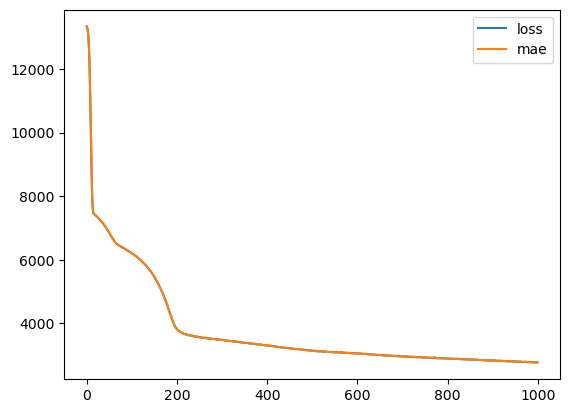

In [360]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()

### Feature Scale Data (Normalization and Standardization)

<Axes: ylabel='Frequency'>

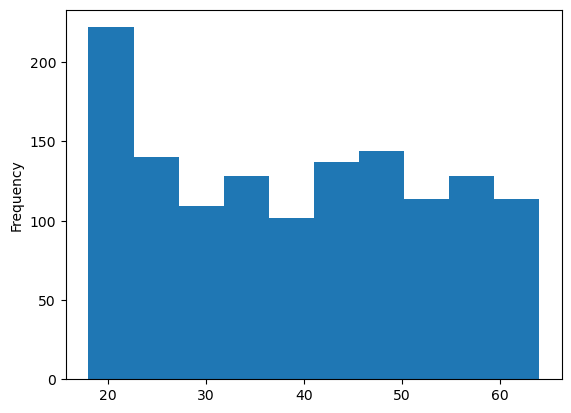

In [361]:
# See Histogram of Age
X["age"].plot(kind="hist")

In [362]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [363]:
# Get data from CVS
insurance = pd.read_csv("data/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [374]:
# To prepare data, we can borrow few functions from sk-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [380]:
# Improved Model
tf.random.set_seed(42)

# Build a neural network model to fit on our data
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae, 
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
history = insurance_model_3.fit(X_train_normal, tf.expand_dims(y_train, axis=-1), epochs=1000) 

Epoch 1/1000
34/34 [==============================] - 0s 1ms/step - loss: 13343.4355 - mae: 13343.4355
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 13333.3975 - mae: 13333.3975
Epoch 3/1000
34/34 [==============================] - 0s 1ms/step - loss: 13308.9424 - mae: 13308.9424
Epoch 4/1000
34/34 [==============================] - 0s 1ms/step - loss: 13258.4619 - mae: 13258.4619
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 13170.4561 - mae: 13170.4561
Epoch 6/1000
34/34 [==============================] - 0s 1ms/step - loss: 13034.0361 - mae: 13034.0361
Epoch 7/1000
34/34 [==============================] - 0s 1ms/step - loss: 12839.2861 - mae: 12839.2861
Epoch 8/1000
34/34 [==============================] - 0s 1ms/step - loss: 12576.3916 - mae: 12576.3916
Epoch 9/1000
34/34 [==============================] - 0s 1ms/step - loss: 12235.3760 - mae: 12235.3760
Epoch 10/1000
34/34 [==============================] - 0s 1ms/step - loss

In [381]:
# Evaluate the model
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3161.3193 - mae: 3161.3193


[3161.3193359375, 3161.3193359375]